#importing required libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#input Image

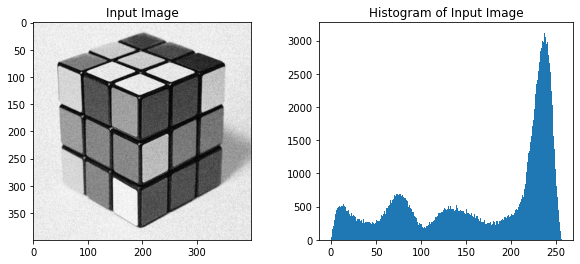

In [2]:
path_1 = "../img/rubiks_cube.png"
img_1 = cv2.imread(path_1, cv2.IMREAD_GRAYSCALE)
resized_dimension = (400,400)
img_1 = cv2.resize(img_1, resized_dimension)
figure, axis = plt.subplots(1,2, figsize=(10,4))
axis[0].imshow(img_1, "gray")
axis[0].set_title("Input Image")
axis[1].hist(img_1.ravel(),256,[0,256])
axis[1].set_title("Histogram of Input Image")
plt.show()

#reference Image

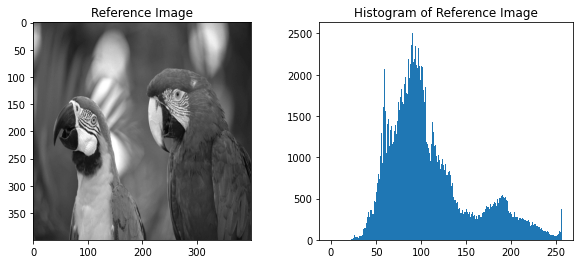

In [3]:
path = "../img/birdie.png"
img_2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resized_dimension = (400,400)
img_2 = cv2.resize(img_2,resized_dimension)
figure, axis = plt.subplots(1,2, figsize=(10,4))
axis[0].imshow(img_2, "gray")
axis[0].set_title("Reference Image")
axis[1].hist(img_2.ravel(),256,[0,256])
axis[1].set_title("Histogram of Reference Image")
plt.show()

#Creating Required Helper Functions

#probability distibution function of the intensity

In [4]:
def _get_pdf(img):
    pdf = np.zeros((256,), dtype="float64")
   
    img_size = img.shape[0]*img.shape[1]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = img.item(i,j)
            pdf[x]+=1
   

    return pdf/img_size
        

#cumulative distibution function of the intensity

In [5]:
def _get_cdf(pdf):
    cdf = [0.0 for _ in range(256)]
    cumulative_sum = 0
    for i in range(256):
        cumulative_sum+=pdf[i]
        cdf[i]=cumulative_sum
    return cdf

#Histogram Matching(Specification)

#PDF of input and reference image

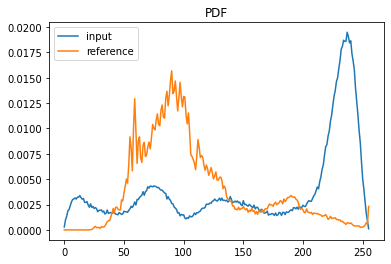

In [6]:
pdf_input = _get_pdf(img_1)
pdf_reference = _get_pdf(img_2)
plt.plot(pdf_input, label="input")
plt.plot(pdf_reference, label="reference")
plt.legend(loc="upper left")
plt.title("PDF")
plt.show()

#CDF of input and reference Image

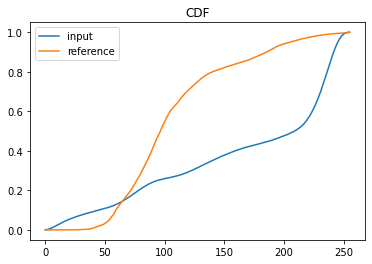

In [7]:
cdf_input = _get_cdf(pdf_input)
cdf_reference = _get_cdf(pdf_reference)
plt.plot(cdf_input, label="input")
plt.plot(cdf_reference, label="reference")
plt.legend(loc="upper left")
plt.title("CDF")
plt.show()

#Matching the histogram of input image with our reference image

In [8]:
M = np.zeros((256,1), dtype="uint8")
for i in range(256):
    diff = abs(cdf_input[i]-cdf_reference)
    min_diff_idx = np.argmin(diff)
    M[i]=min_diff_idx

#Generating Output Image

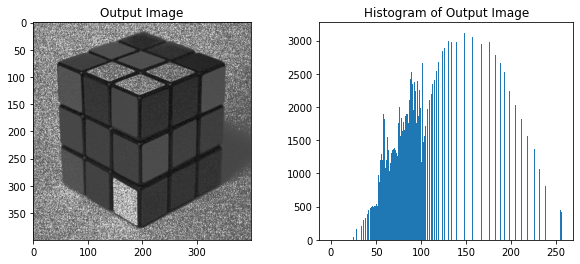

In [9]:
output = M[img_1.ravel()]
output = output.reshape(img_1.shape)
pdf_output = _get_pdf(output)
cdf_output = _get_cdf(pdf_output)
figure, axis = plt.subplots(1,2, figsize=(10,4))
axis[0].imshow(output, "gray")
axis[0].set_title("Output Image")
axis[1].hist(output.ravel(),256,[0,256])
axis[1].set_title("Histogram of Output Image")
plt.show()


#Comparing Input and  Reference and Output Images

#Images

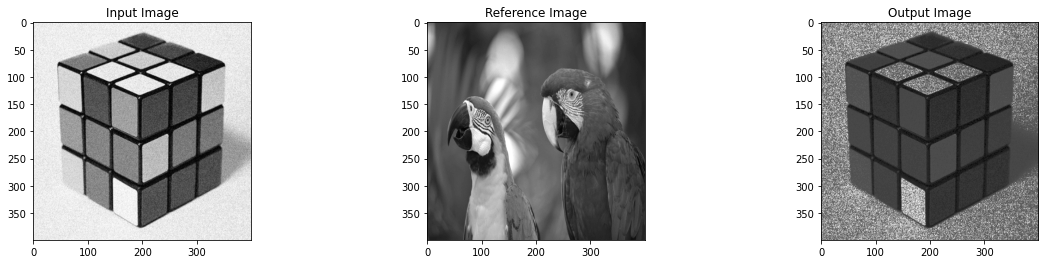

In [10]:
figure , axis = plt.subplots(1,3, figsize=(20,4))
axis[0].set_title("Input Image")
axis[0].imshow(img_1, "gray")
axis[1].set_title("Reference Image")
axis[1].imshow(img_2, "gray")
axis[2].set_title("Output Image")
axis[2].imshow(output, "gray")
plt.show()
# cv2.imshow("input", img_1)
# cv2.imshow("output", output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#Histogram

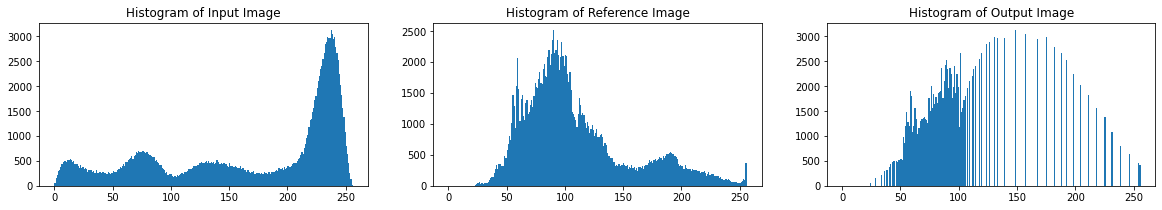

In [11]:
figure , axis = plt.subplots(1,3, figsize=(20,3))
axis[0].set_title("Histogram of Input Image")
axis[0].hist(img_1.ravel(),256,[0,256])
axis[1].set_title("Histogram of Reference Image")
axis[1].hist(img_2.ravel(),256,[0,256])
axis[2].set_title("Histogram of Output Image")
axis[2].hist(output.ravel(),256,[0,256])
plt.show()

#CDF

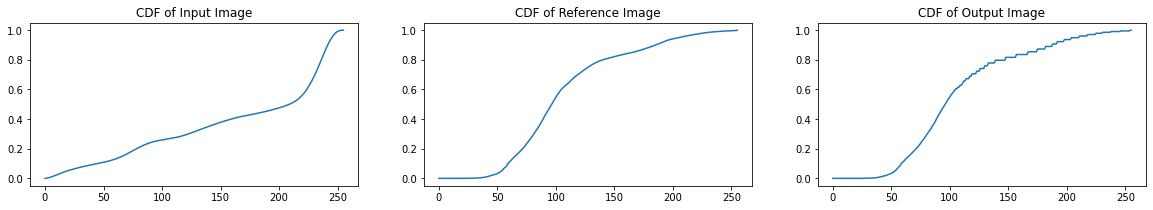

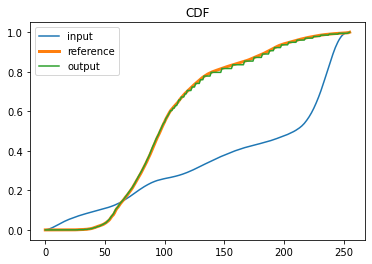

In [13]:
figure , axis = plt.subplots(1,3, figsize=(20,3))
axis[0].set_title("CDF of Input Image")
axis[0].plot(cdf_input)
axis[1].set_title("CDF of Reference Image")
axis[1].plot(cdf_reference)
axis[2].set_title("CDF of Output Image")
axis[2].plot(cdf_output)
plt.show()
plt.plot(cdf_input, label="input")
plt.plot(cdf_reference, label="reference", linewidth=3)
plt.plot(cdf_output,label="output")
plt.title("CDF")
plt.legend(loc="upper left")
plt.show()